In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import traceback
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv(r"C:\Users\charl\Downloads\2dfd2de0d4f8727f873422c5d959fff5-fa71405126017e6a37bea592440b4bee94bf7b9e\2dfd2de0d4f8727f873422c5d959fff5-fa71405126017e6a37bea592440b4bee94bf7b9e\titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.drop(columns=["Cabin"],inplace=True)

In [6]:
df.drop(columns=["Name"],inplace=True)

In [7]:
df.drop(columns=["Ticket"],inplace=True)

In [8]:
df.loc[df["Embarked"] == '']

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


<AxesSubplot:title={'center':'Target Variable Value Counts'}>

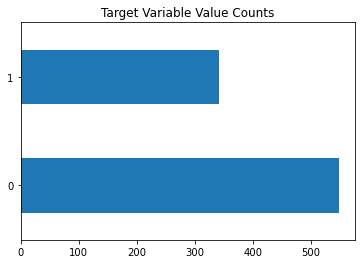

In [9]:
df['Survived'].value_counts().plot.barh(title='Target Variable Value Counts')

In [10]:
len(df)-len(df.drop_duplicates())

0

In [11]:
df.groupby('Pclass')['Survived'].count()

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

In [25]:
# Ignore warnings from scikit-learn to make this notebook a bit nicer
import warnings
warnings.simplefilter('ignore')

# Models may be implemented as pipelines
from sklearn.pipeline import Pipeline

# Used to divide our dataseets into train/test splits
# Data will be randomly shuffled so running this notebook multiple times may lead to different results
from sklearn.model_selection import train_test_split as tts

# Visual analysis of model performance
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier import classification_report
from yellowbrick.regressor import prediction_error, ResidualsPlot

# Set the default figure size for matplotlib
plt.rcParams['figure.figsize'] = (9, 6)


from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
#Pipeline toolset
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler

#Model toolset
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import Ridge
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Evaluation toolset
from sklearn.model_selection import StratifiedKFold, cross_val_score
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.features import FeatureImportances
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ROCAUC


#from yellowbrick.datasets import load_game
from yellowbrick.target import ClassBalance
from sklearn.utils import resample

from sklearn.model_selection import train_test_split as tts
from sklearn.impute import SimpleImputer

In [13]:
def train_test(X,y):
    X_train, X_test, y_train, y_test = tts(X, y, test_size=.2)
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)

In [14]:
def viz_cb(y,lst):
    visualizer = ClassBalance(labels=lst)
    visualizer.fit(y)        # Fit the data to the visualizer
    visualizer.show()        # Finalize and render the figure

In [15]:
def class_balance(df,target):
    print('Raw Value Counts:','\n',df[target].value_counts())
    X = df.loc[:, df.columns != target]
    y = df[target]
    #make a dataframe of value counts and a list of the values in the target
    df1 = y.value_counts().to_frame('count').reset_index(level=0).rename(columns={'index':'value'})
    label_lst = list(df1['value'])
    
    viz_cb(y,label_lst)

    #identify minimum value number and label name
    mi = df1['count'].min()
    name = df1.loc[df1['count'] == mi,'value'].iloc[0]
    print('min value is',name,'in values',label_lst)

    seed = 123
    # Downsample majority class
    
    #use min value number and label name to resample the dataframe
    df2 = pd.concat([resample(df[df[target]== i],
                            replace=False,
                            n_samples=mi,
                            random_state=seed) for i in label_lst if i != name]).append(df[df[target]== name])
    print('Resampled Value Counts:','\n',df2[target].value_counts())
    X = df2.loc[:, df.columns != target]
    y = df2[target]
    viz_cb(y,label_lst)
    return df2

In [16]:
def visualize_model(X, y, estimator,label_lst, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
    ("columns", ColumnTransformer([
        ('onehot', OneHotEncoder(), categorical),
        ('scalar', RobustScaler(), numeric),
        ('scalar2', RobustScaler(), numeric2),
    ], remainder='drop')),
        ("imputer",SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('estimator', estimator)
])

    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)
    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(
        model, classes=label_lst,
        cmap="YlGn", size=(600, 360), **kwargs
    )
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

In [17]:
def conf_matrix(X,y,estimator,label_lst, **kwargs):
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
    ("columns", ColumnTransformer([
        ('onehot', OneHotEncoder(), categorical),
        ('scalar', RobustScaler(), numeric),
        ('scalar2', RobustScaler(), numeric2),
    ], remainder='drop')),
        ("imputer",SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('estimator', estimator)
])


    #Create the train and test data
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)
    #model.fit(X, y)
    # Instantiate the visualizer with the classification model
    confusion_matrix(
        model,
        X_train, y_train, X_test, y_test,
        classes=label_lst
    )
    plt.tight_layout()
    plt.show()

In [18]:
def roc_auc(X,y,estimator,label_lst,**kwargs):
        y = LabelEncoder().fit_transform(y)
        model = Pipeline([
    ("columns", ColumnTransformer([
        ('onehot', OneHotEncoder(), categorical),
        ('scalar', RobustScaler(), numeric),
        ('scalar2', RobustScaler(), numeric2),
    ], remainder='drop')),
        ("imputer",SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('estimator', estimator)
])
        #Create the train and test data
        X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)
    # Instantiate the visualizer with the classification model

        visualizer = ROCAUC(model, classes=["Non-Survivors","Survivors"
])

        visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
        visualizer.score(X_test, y_test)        # Evaluate the model on the test data
        visualizer.show()                       # Finalize and show the figure

In [23]:
categorical = make_column_selector(dtype_include=np.object)
numeric = make_column_selector(dtype_include=np.int64)
numeric2 = make_column_selector(dtype_include=np.float64)


models = [
    SVC(gamma='auto'), NuSVC(gamma='auto'), LinearSVC(),
    SGDClassifier(max_iter=100, tol=1e-3), KNeighborsClassifier(),
    LogisticRegression(solver='lbfgs'), LogisticRegressionCV(cv=3),
    BaggingClassifier(), ExtraTreesClassifier(n_estimators=300),
    RandomForestClassifier(n_estimators=300),AdaBoostClassifier(),GradientBoostingClassifier(),
    ElasticNet()
]


def score_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
    ("columns", ColumnTransformer([
        ('onehot', OneHotEncoder(), categorical),
        ('scalar', RobustScaler(), numeric),
        ('scalar2', RobustScaler(), numeric2),
    ], remainder='drop')),
        ("imputer",SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('estimator', estimator)
])

    # Instantiate the classification model and visualizer
    model.fit(X, y, **kwargs)

    expected  = y
    predicted = model.predict(X)

    # Compute and return F1 (harmonic mean of precision and recall)
    print("F1 SCORE {}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted,average='micro')))

In [20]:
X = df.loc[:, df.columns != 'Survived']
y = df['Survived']

Raw Value Counts: 
 0    549
1    342
Name: Survived, dtype: int64


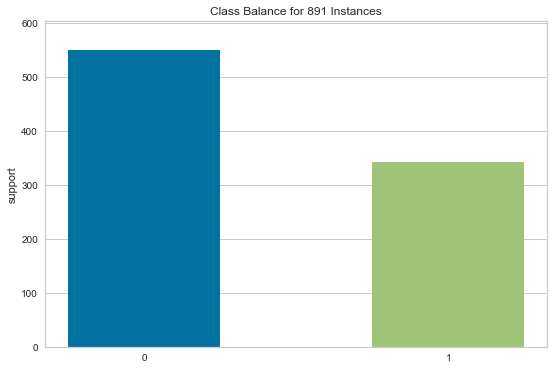

min value is 1 in values [0, 1]
Resampled Value Counts: 
 0    342
1    342
Name: Survived, dtype: int64


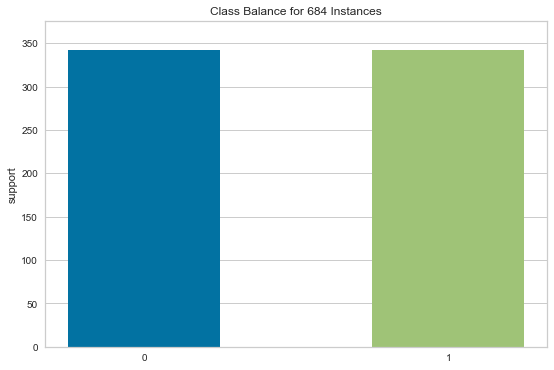

(547, 8) (547,)
(137, 8) (137,)
F1 SCORE SVC: 0.8070175438596491
SVC(gamma='auto') Traceback (most recent call last):
  File "<ipython-input-27-275b72280718>", line 8, in <module>
    visualize_model(X, y, model, ["Non-Survivors","Survivors"])
  File "<ipython-input-16-2a38dd87654e>", line 23, in visualize_model
    visualizer.score(X_test, y_test)
  File "C:\Users\charl\anaconda3\lib\site-packages\yellowbrick\classifier\classification_report.py", line 181, in score
    super(ClassificationReport, self).score(X, y)
  File "C:\Users\charl\anaconda3\lib\site-packages\yellowbrick\classifier\base.py", line 238, in score
    self.score_ = self.estimator.score(X, y)
  File "C:\Users\charl\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\charl\anaconda3\lib\site-packages\sklearn\pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "C:\Users\charl\anaconda3\li

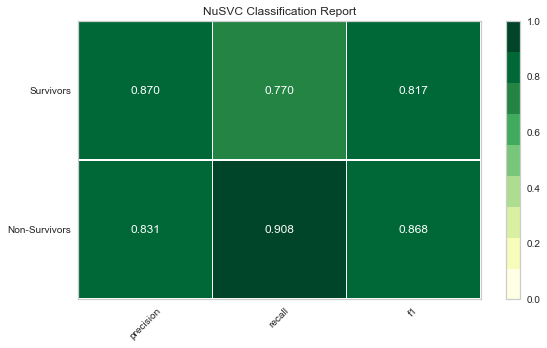

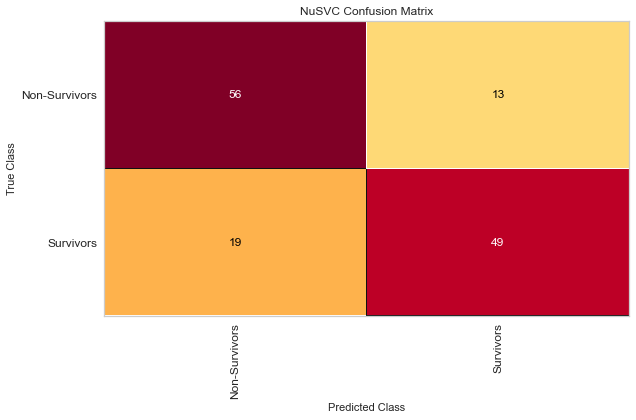

<Figure size 648x432 with 0 Axes>

NuSVC(gamma='auto') Traceback (most recent call last):
  File "<ipython-input-27-275b72280718>", line 10, in <module>
    roc_auc(X, y, model, ["Non-Survivors","Survivors"])
  File "<ipython-input-18-5cf5701022cb>", line 20, in roc_auc
    visualizer.score(X_test, y_test)        # Evaluate the model on the test data
  File "C:\Users\charl\anaconda3\lib\site-packages\yellowbrick\classifier\rocauc.py", line 334, in score
    self._score_micro_average(y, y_pred, classes, n_classes)
  File "C:\Users\charl\anaconda3\lib\site-packages\yellowbrick\classifier\rocauc.py", line 490, in _score_micro_average
    self.fpr[MICRO], self.tpr[MICRO], _ = roc_curve(y.ravel(), y_pred.ravel())
  File "C:\Users\charl\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\charl\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py", line 913, in roc_curve
    fps, tps, thresholds = _binary_clf_curve(
  File "C:\Users\charl\anaconda3\lib

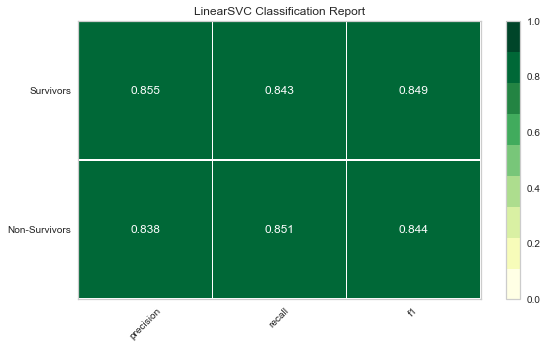

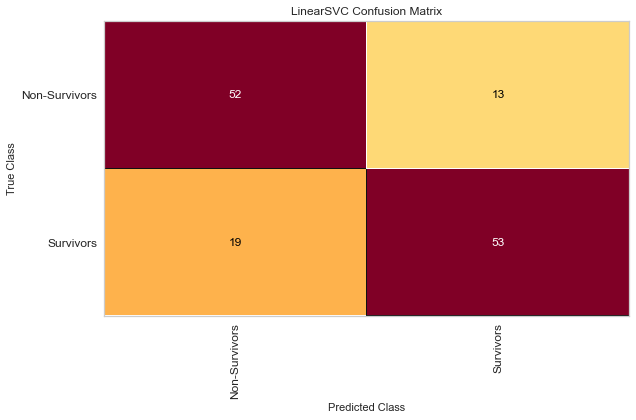

<Figure size 648x432 with 0 Axes>

LinearSVC() Traceback (most recent call last):
  File "<ipython-input-27-275b72280718>", line 10, in <module>
    roc_auc(X, y, model, ["Non-Survivors","Survivors"])
  File "<ipython-input-18-5cf5701022cb>", line 20, in roc_auc
    visualizer.score(X_test, y_test)        # Evaluate the model on the test data
  File "C:\Users\charl\anaconda3\lib\site-packages\yellowbrick\classifier\rocauc.py", line 334, in score
    self._score_micro_average(y, y_pred, classes, n_classes)
  File "C:\Users\charl\anaconda3\lib\site-packages\yellowbrick\classifier\rocauc.py", line 490, in _score_micro_average
    self.fpr[MICRO], self.tpr[MICRO], _ = roc_curve(y.ravel(), y_pred.ravel())
  File "C:\Users\charl\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\charl\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py", line 913, in roc_curve
    fps, tps, thresholds = _binary_clf_curve(
  File "C:\Users\charl\anaconda3\lib\site-pa

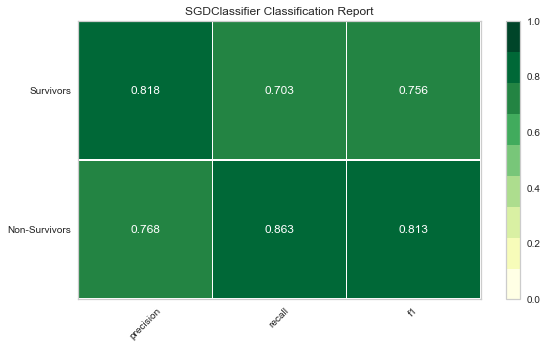

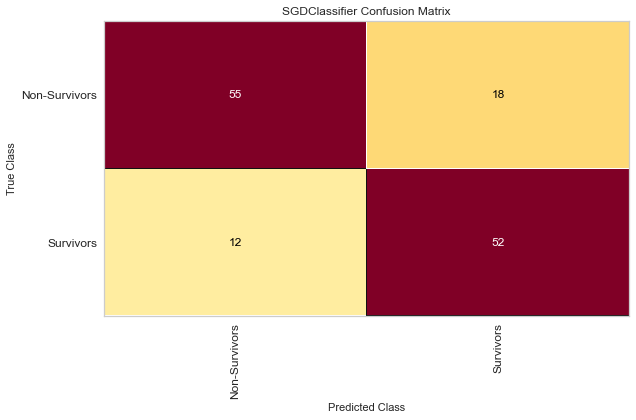

<Figure size 648x432 with 0 Axes>

SGDClassifier(max_iter=100) Traceback (most recent call last):
  File "<ipython-input-27-275b72280718>", line 10, in <module>
    roc_auc(X, y, model, ["Non-Survivors","Survivors"])
  File "<ipython-input-18-5cf5701022cb>", line 20, in roc_auc
    visualizer.score(X_test, y_test)        # Evaluate the model on the test data
  File "C:\Users\charl\anaconda3\lib\site-packages\yellowbrick\classifier\rocauc.py", line 334, in score
    self._score_micro_average(y, y_pred, classes, n_classes)
  File "C:\Users\charl\anaconda3\lib\site-packages\yellowbrick\classifier\rocauc.py", line 490, in _score_micro_average
    self.fpr[MICRO], self.tpr[MICRO], _ = roc_curve(y.ravel(), y_pred.ravel())
  File "C:\Users\charl\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\charl\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py", line 913, in roc_curve
    fps, tps, thresholds = _binary_clf_curve(
  File "C:\Users\charl\anaco

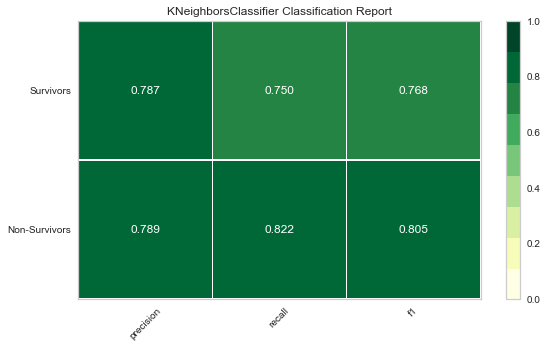

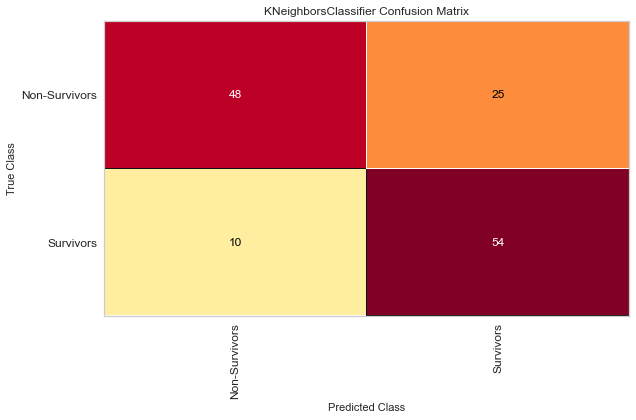

<Figure size 648x432 with 0 Axes>

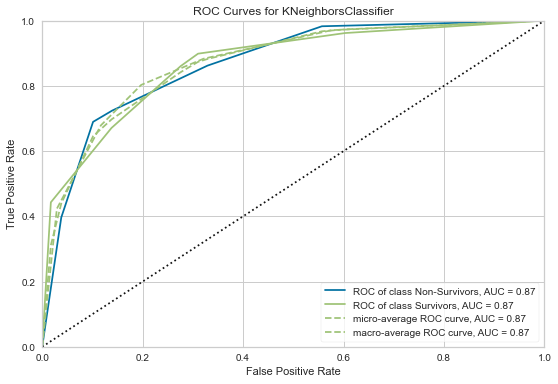

F1 SCORE LogisticRegression: 0.7880116959064327


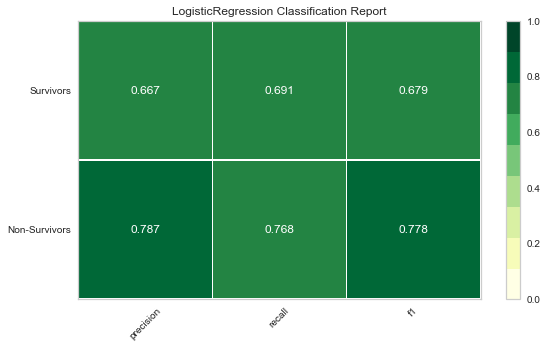

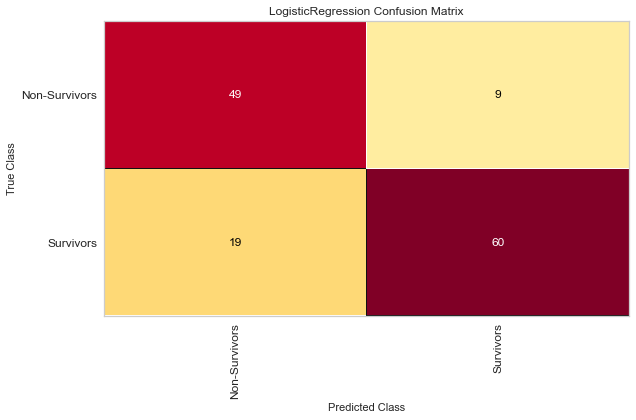

<Figure size 648x432 with 0 Axes>

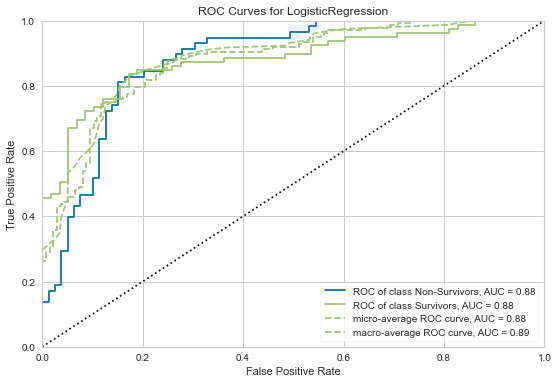

F1 SCORE LogisticRegressionCV: 0.7719298245614035


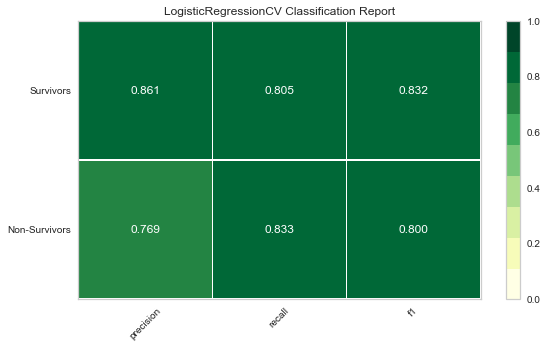

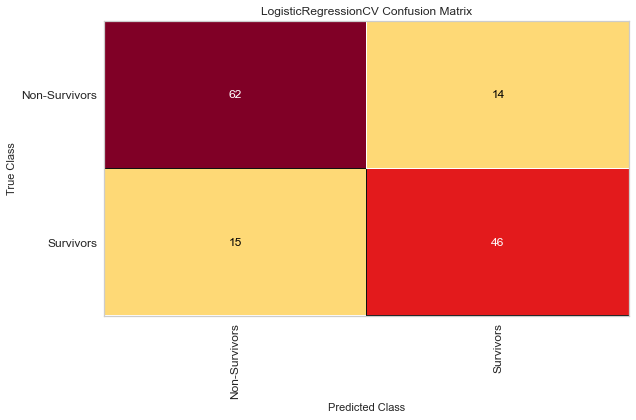

<Figure size 648x432 with 0 Axes>

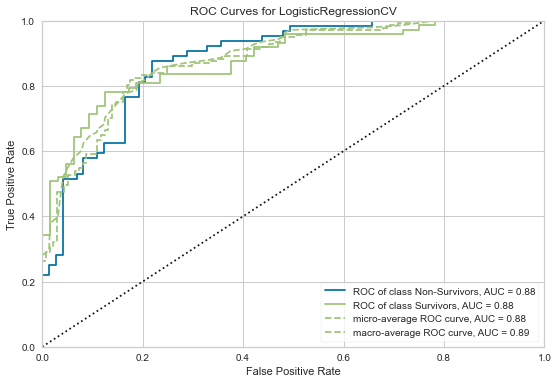

F1 SCORE BaggingClassifier: 0.9824561403508771


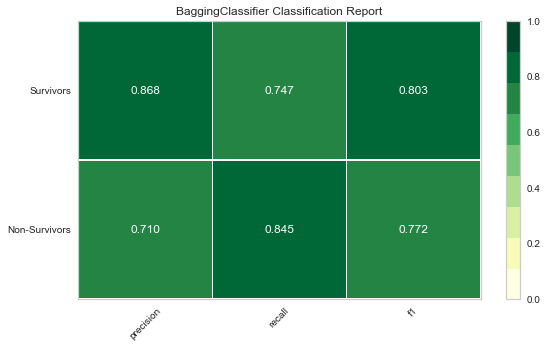

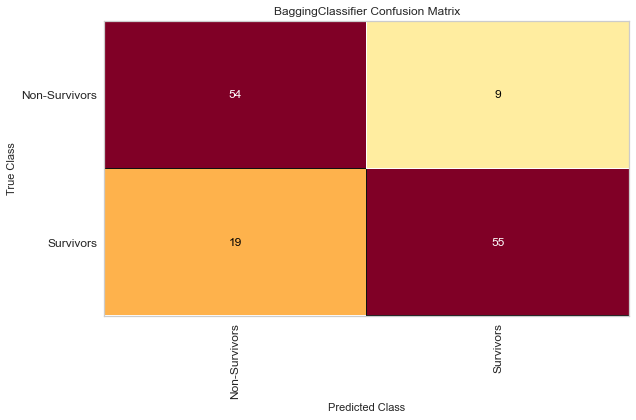

<Figure size 648x432 with 0 Axes>

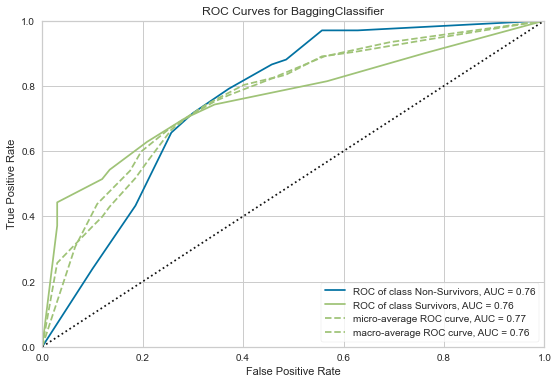

F1 SCORE ExtraTreesClassifier: 1.0


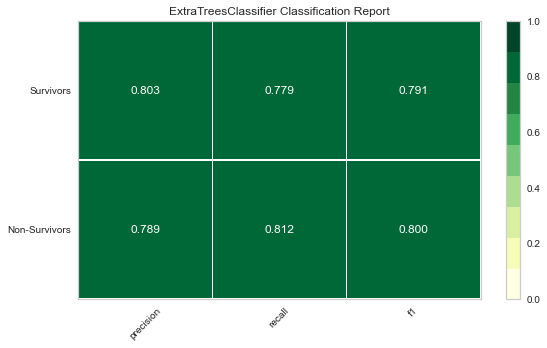

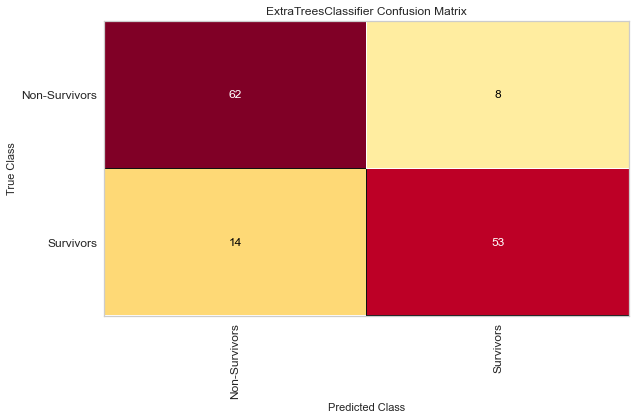

<Figure size 648x432 with 0 Axes>

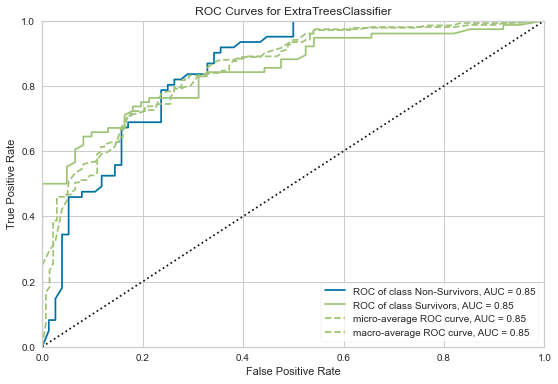

F1 SCORE RandomForestClassifier: 1.0


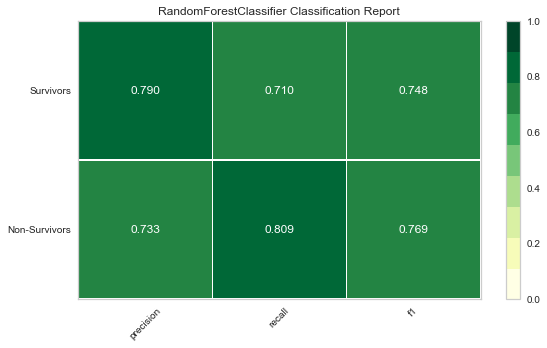

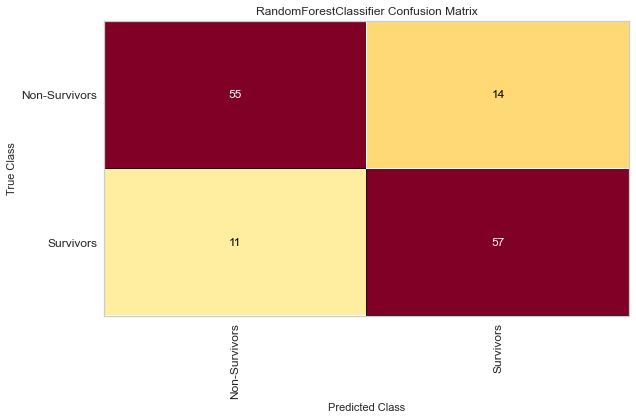

<Figure size 648x432 with 0 Axes>

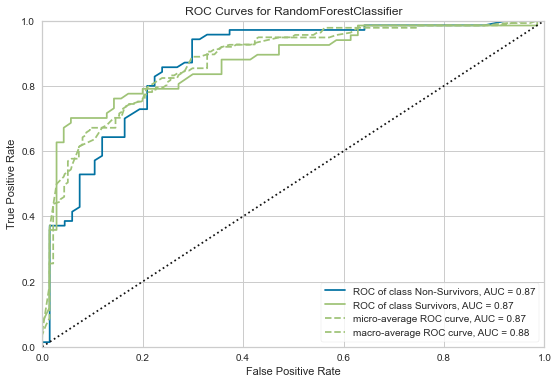

In [27]:
data = class_balance(df,'Survived')
X = data.loc[:, data.columns != 'Survived']
y = data['Survived']
train_test(X,y)
for model in models:
    try:
        score_model(X, y, model)
        visualize_model(X, y, model, ["Non-Survivors","Survivors"])
        conf_matrix(X, y, model,["Non-Survivors","Survivors"])
        roc_auc(X, y, model, ["Non-Survivors","Survivors"])
    except Exception as exc:
        print(model, 
              traceback.format_exc(), 
              exc)